In [158]:
import pandas as pd
import numpy as np
import json
import random
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Flatten
import matplotlib.pyplot as plt

In [159]:
with open('cancer.json') as f:
    data=json.load(f)

In [160]:
d=[]
for i in data['intents']:
    for j in i['patterns']:
        d.append((j,i['tag']))

In [161]:
d

[('hello', 'greetings'),
 ('hey', 'greetings'),
 ('hi', 'greetings'),
 ('good day', 'greetings'),
 ('Greetings', 'greetings'),
 ("what's up?", 'greetings'),
 ('how is it going', 'greetings'),
 ('cya', 'goodbye'),
 ('See you later', 'goodbye'),
 ('Goodbye', 'goodbye'),
 ('I am Leaving', 'goodbye'),
 ('Have a good day', 'goodbye'),
 ('bye', 'goodbye'),
 ('cao', 'goodbye'),
 ('see ya', 'goodbye'),
 ('What is cancer?', 'q1'),
 ("What's cancer", 'q1'),
 ('cancer', 'q1'),
 ('What causes cancer?', 'q2'),
 ('causes of cancer', 'q2'),
 ('causes', 'q2'),
 ('What causes it?', 'q2'),
 ('Does cigarette smoke really cause cancer?', 'q3'),
 ('cigarette', 'q3'),
 ('smoking', 'q3'),
 ('smoking cigarette', 'q3'),
 ('Does smoking cause cancer?', 'q3'),
 ('Does cigarette smoke really cause it?', 'q3'),
 ('Can cancer be prevented?', 'q4'),
 ('prevent', 'q4'),
 ('preventing', 'q4'),
 ('prevent cancer', 'q4'),
 ('Can be prevented?', 'q4'),
 ('Are chemicals and pollutants causing cancer?', 'q5'),
 ('chemicals

In [162]:
df=pd.DataFrame(data=d,columns=['pattern','tag'])
df

,pattern,tag
0,hello,greetings
1,hey,greetings
2,hi,greetings
3,good day,greetings
4,Greetings,greetings
...,...,...
211,cancer survival rates,q45
212,rates,q45
213,survival,q45
214,Tell me more,q46


In [163]:
resp=dict()
for i in data['intents']:
    resp[i['tag']]=i['responses']

In [164]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df['pattern'])

In [165]:
tokenizer.word_index

{'cancer': 1,
 'is': 2,
 'of': 3,
 'what': 4,
 'can': 5,
 'the': 6,
 'it': 7,
 'a': 8,
 'fatigue': 9,
 'how': 10,
 'are': 11,
 'get': 12,
 'does': 13,
 'why': 14,
 'there': 15,
 'for': 16,
 'treatment': 17,
 'my': 18,
 'be': 19,
 'i': 20,
 'anemia': 21,
 'about': 22,
 'cancers': 23,
 'more': 24,
 'cause': 25,
 'different': 26,
 'effects': 27,
 'so': 28,
 'in': 29,
 'test': 30,
 'people': 31,
 'side': 32,
 'chemotherapy': 33,
 'vaccine': 34,
 'survival': 35,
 'rates': 36,
 "isn't": 37,
 'best': 38,
 'attitudes': 39,
 'stress': 40,
 'progress': 41,
 'cure': 42,
 'have': 43,
 'causes': 44,
 'cigarette': 45,
 'to': 46,
 'many': 47,
 'with': 48,
 'help': 49,
 'me': 50,
 'effect': 51,
 'symptom': 52,
 'from': 53,
 'doctor': 54,
 'ever': 55,
 'tell': 56,
 'contagious': 57,
 'spread': 58,
 'you': 59,
 'smoking': 60,
 'prevented': 61,
 'prevent': 62,
 'chemicals': 63,
 'and': 64,
 'pollutants': 65,
 'diagnosis': 66,
 'do': 67,
 'problems': 68,
 'conventional': 69,
 'ask': 70,
 'family': 71,
 'f

In [166]:
seq=tokenizer.texts_to_sequences(df['pattern'])

In [167]:
seq[:10]

[[122],
 [123],
 [124],
 [90, 91],
 [125],
 [92, 126],
 [10, 2, 7, 127],
 [128],
 [93, 59, 129],
 [130]]

In [168]:
maxlen=max([len(i) for i in seq])
maxlen

15

In [169]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

176

In [170]:
pad_seq=pad_sequences(seq,maxlen=maxlen,padding='post')
pad_seq

array([[122,   0,   0, ...,   0,   0,   0],
       [123,   0,   0, ...,   0,   0,   0],
       [124,   0,   0, ...,   0,   0,   0],
       ...,
       [ 35,   0,   0, ...,   0,   0,   0],
       [ 56,  50,  24, ...,   0,   0,   0],
       [ 56,  50,  24, ...,   0,   0,   0]])

In [171]:
pad_seq[0]

array([122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

In [172]:
tokenizer.word_index['hello']

122

In [173]:
glove_file=open('glove.6B.100d.txt',encoding='utf-8')
embedding_dictionary=dict()
for line in glove_file:
    record=line.split()
    word=record[0]
    vector=np.asarray(record[1:],dtype='float32')
    embedding_dictionary[word]=vector
glove_file.close()

In [174]:
embedding_dictionary['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

In [175]:
embedding_vectors=np.zeros((vocab_size,100))
for word,index in tokenizer.word_index.items():
    embedding=embedding_dictionary.get(word)
    if embedding is not None:
        embedding_vectors[index]=embedding

In [176]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30875999,  0.57172   , -0.76573002, ..., -0.49552   ,
         0.36862999, -0.43560001],
       [-0.54263997,  0.41475999,  1.03219998, ..., -1.29690003,
         0.76217002,  0.46349001],
       ...,
       [ 0.23939   ,  0.64866   ,  0.64029002, ..., -0.46924999,
         0.40617999,  0.1339    ],
       [ 0.0056246 , -0.19442999,  0.87709999, ...,  0.094497  ,
        -0.097547  ,  0.060376  ],
       [-0.29278001,  0.02436   , -0.13517   , ..., -1.00650001,
        -0.11338   , -0.82876003]])

In [177]:
embedding_vectors[1]

array([ 0.30875999,  0.57172   , -0.76573002,  0.076863  ,  0.21052   ,
       -0.13312   ,  0.88274002, -0.2208    , -0.098611  , -0.062059  ,
       -0.51871002,  0.32534999, -0.13609   , -0.042059  ,  0.91228002,
       -0.19718   ,  0.021831  , -0.55353999,  0.49573001,  0.12114   ,
       -0.83796   , -0.48607001, -0.70015001,  0.83936   , -0.23379   ,
        1.33099997,  1.01689994, -1.43069994,  0.28702   ,  0.15237001,
        0.55934   ,  0.90224999,  0.63037002,  0.52102   ,  0.15741   ,
        0.12084   , -0.53898001,  0.69510001, -0.47861001,  0.91841   ,
       -0.38677999,  0.37728   , -0.74399   , -1.41910005,  0.22579999,
        0.27805001,  0.2676    ,  0.016615  , -1.03199995, -0.57549   ,
        0.90280998, -0.53983998,  0.12577   ,  0.25665   , -0.0065531 ,
       -1.74230003, -0.26671001, -0.24116001,  0.62342   ,  0.80269998,
        0.21934   ,  1.39390004,  1.08850002, -0.26754999,  0.34711999,
        0.91192001, -0.10961   ,  0.036696  ,  0.41681001, -0.08

In [178]:
num_classes=len(df['tag'].unique())
num_classes

48

In [179]:
le=LabelEncoder()
df['tag_num']=le.fit_transform(df['tag'])

In [180]:
df.sample(5)

,pattern,tag,tag_num
126,Are the side effects of chemotherapy worse tha...,q24,18
201,gender,q43,39
181,test,q38,33
194,Why are older people more prone to it in general?,q41,37
137,anemia,q27,21


In [181]:
X=pad_seq
y=df['tag_num']

In [182]:
X

array([[122,   0,   0, ...,   0,   0,   0],
       [123,   0,   0, ...,   0,   0,   0],
       [124,   0,   0, ...,   0,   0,   0],
       ...,
       [ 35,   0,   0, ...,   0,   0,   0],
       [ 56,  50,  24, ...,   0,   0,   0],
       [ 56,  50,  24, ...,   0,   0,   0]])

In [183]:
y

0       1
1       1
2       1
3       1
4       1
       ..
211    41
212    41
213    41
214    42
215    42
Name: tag_num, Length: 216, dtype: int32

In [184]:
len(X)

216

In [185]:
len(y)

216

In [186]:
i=Input(shape=(maxlen,))
x=Embedding(vocab_size,100,embeddings_initializer=Constant(embedding_vectors),trainable=False)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(num_classes,activation='softmax')(x)
model=Model(i,x)

In [187]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [188]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 15, 100)             │          17,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 15, 10)              │           4,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 48)                  │           7,248 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,288 (114.41 KB)

 Trainable params: 29,288 (114.41 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
history=model.fit(X,y,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0262 - loss: 3.8833
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0529 - loss: 3.8330 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0576 - loss: 3.7832     
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1363 - loss: 3.6939 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1372 - loss: 3.6436
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0974 - loss: 3.5893
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1283 - loss: 3.5520 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2387 - loss: 3.3885 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2286 - loss: 3.3007
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2550 - loss: 3.1778 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3367 - loss: 3.0123 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3232 - l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9442 - loss: 0.1377
Epoch 70/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9314 - loss: 0.1457 
Epoch 71/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9299 - loss: 0.1538
Epoch 72/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9379 - loss: 0.1418
Epoch 73/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9547 - loss: 0.1360
Epoch 74/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9340 - loss: 0.1546 
Epoch 75/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9100 - loss: 0.1523
Epoch 76/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9272 - loss: 0.1488
Epoch 77/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9520 - loss: 0.1417
Epoch 78/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9269 - loss: 0.1441 
Epoch 79/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9424 - loss: 0.1374 
Epoch 80/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9273 - loss: 0.

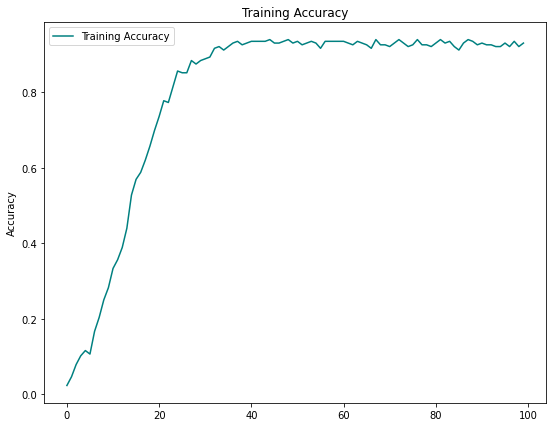

In [190]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],label='Training Accuracy',color='teal')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

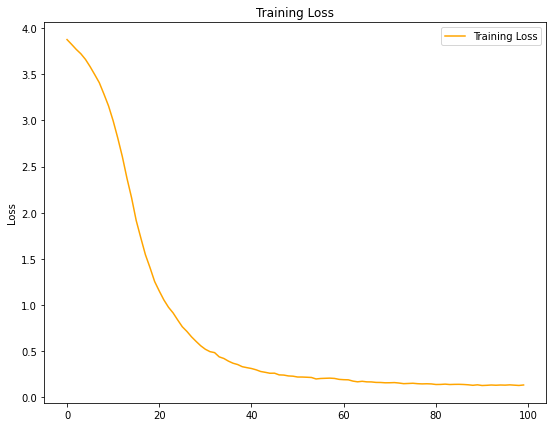

In [191]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],label='Training Loss',color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [214]:
while True:
    text_p=[]
    prediction_input=input('You: ')
    prediction_input=tokenizer.texts_to_sequences([prediction_input])
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],maxlen=maxlen,padding='post')
    y_pred=le.inverse_transform([np.argmax(model.predict(prediction_input))])[0]
    print('AliTech:',random.choice(resp[y_pred]))
    if y_pred=='goodbye':
        break

You: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
AliTech: Hello!
You: what is cancer?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
AliTech: Cancer is a disease of the body's cells. Normally cells grow and multiply in a controlled way, however, sometimes cells become abnormal and keep growing. Abnormal cells can form a mass called a tumour
You: what causes it?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
AliTech: Cancer is caused by changes (mutations) to the DNA within cells. The DNA inside a cell is packaged into a large number of individual genes, each of which contains a set of instructions telling the cell what functions to perform, as well as how to grow and divide. Errors in the instructions can cause the cell to stop its normal function and may allow a cell to become cancerous.
You: can be prevented?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
AliTech: Not all cancers can be prevented but there are things you can do to reduce your risk.
You: can fatigue be prevented?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/ste